In [139]:
import pandas as pd

import matplotlib.pyplot as plt

import datetime

In [140]:
performance = pd.read_csv('base_return_0_child.csv')

performance_2 = pd.read_csv('benchmark_performance.csv')

performance

,sym,year,num_trades,avg_ret_excl_fee,acc_ret_excl_fee,avg_ret_incl_fee,acc_ret_incl_fee,avg_dur,winrate,gainmax,lossmax,volatility,sharpe
0,BNB,2017,7,79.278440,46.829650,78.920240,46.164700,16.571430,1.000000,1.501534,0.137125,1.153625,39.982410
1,BNB,2018,33,-5.304382,-0.846541,-5.493584,-0.856342,6.424242,0.121212,0.079290,-0.213425,0.366394,-2.446389
2,BNB,2019,37,2.408496,0.780040,2.203883,0.653073,7.540541,0.432432,0.447306,-0.126938,0.848013,0.722952
3,BNB,2020,42,3.046638,1.083136,2.840751,0.915300,9.119048,0.333333,0.605808,-0.187318,1.144024,0.765106
4,BNB,2021,42,87.253500,54043.560000,86.879360,49689.260000,15.690480,0.523810,10.833490,-0.280490,16.216700,3064.076000
5,BNB,2022,40,-0.614498,-0.284869,-0.813071,-0.339851,7.525000,0.350000,0.184291,-0.083681,0.427405,-0.888737
6,BNB,2023,28,4.574245,1.306477,4.365306,1.180864,14.071430,0.321429,0.862130,-0.112931,1.116145,1.022147
7,BNB,2024,12,14.101080,2.764511,13.873110,2.675238,15.916670,0.583333,0.545244,-0.196375,0.823311,3.200780
8,BTC,2017,20,26.723830,48.927600,26.470640,46.969910,13.500000,0.700000,1.271723,-0.117878,1.751557,26.793260
9,BTC,2018,39,-3.075527,-0.734730,-3.269182,-0.754634,6.948718,0.256410,0.142026,-0.152601,0.457577,-1.736615


In [141]:
def cal_accumulated_pl(crypto_performance, col_name = "year", return_type = "avg_ret_excl_fee"):
    
    BTC_accumulated_percent = 1

    # accumulated_percent *= (i['pl_percent'] / 100) + 1
    columns = ["date", "pl_percent"]
    result = pd.DataFrame(columns=columns)
    for i in range(len(crypto_performance)):
        BTC_accumulated_percent *= (crypto_performance.iloc[i][return_type]/100) + 1
        row = [crypto_performance.iloc[i][col_name], (BTC_accumulated_percent - 1) * 10000]
        result.loc[len(result.index)] = row

    return result


def get_performance(performance, crypto = "BTC", return_type = "avg_ret_excl_fee"):

    BTC_performance = performance[performance['sym'] == crypto]

    BTC_performance = BTC_performance[['sym', 'year', return_type]]

    # BTC_performance.drop(['sym', 'year', 'num_trades', 'avg_ret_excl_fee', 'acc_ret_excl_fee', 'avg_ret_incl_fee', 'volume', 'max_value', 'min_value', 'pxenter', 'pxenfee', 'idx', 'side', 'pxexit', 'pxexfee', 'exitdate', 'nholds', 'grs_bps',], axis=1, inplace=True)

    BTC_performance = BTC_performance.reset_index(drop=True)

    # BTC_performance[return_type] = BTC_performance[return_type] / 10000

    BTC_performance.dropna(inplace=True)

    BTC_performance = cal_accumulated_pl(BTC_performance, return_type=return_type)

    # BTC_performance['date'] = BTC_performance['date'].astype(str)

    BTC_performance['date'] = pd.to_datetime(BTC_performance['date'], format="%Y").dt.year

    return BTC_performance


def process_benchmark(performance_2, crypto="BTC"):

    benchmark = performance_2[performance_2["sym.1"] == crypto]

    benchmark = benchmark[['sym.1', 'year', 'returns.1']]

    benchmark.dropna(inplace=True)

    # print(benchmark.info())

    benchmark = cal_accumulated_pl(benchmark, col_name="year", return_type="returns.1")

    # print(benchmark.info())

    benchmark['date'] = pd.to_datetime(benchmark['date'], format="%Y").dt.year

    return benchmark
    
    # btc.drop(['sym', 'returns', 'Unnamed: 2', 'sym.1', 'year', 'returns.1', 'Unnamed: 6', 'sym.2'], axis=1, inplace=True)
    # btc = btc.reset_index(drop=True)
    # btc

benchmark_BTC_performance = process_benchmark(performance_2, crypto="BTC")
benchmark_ETH_performance = process_benchmark(performance_2, crypto="ETH")
benchmark_BNB_performance = process_benchmark(performance_2, crypto="BNB")
benchmark_SOL_performance = process_benchmark(performance_2, crypto="SOL")
benchmark_DOGE_performance = process_benchmark(performance_2, crypto="DOGE")
benchmark_XRP_performance = process_benchmark(performance_2, crypto="XRP")

BTC_performance = get_performance(performance, crypto="BTC")
ETH_performance = get_performance(performance, crypto="ETH")
BNB_performance = get_performance(performance, crypto="BNB")
SOL_performance = get_performance(performance, crypto="SOL")
DOGE_performance = get_performance(performance, crypto="DOGE")
XRP_performance = get_performance(performance, crypto="XRP")

# BTC_performance = pd.concat([BTC_performance, ETH_performance['net_bps']])
BTC_performance

,date,pl_percent
0,2017,2672.383000
1,2018,2282.640439
2,2019,2480.520901
3,2020,3193.768817
4,2021,3800.658566
5,2022,3527.357086
6,2023,4367.690847
7,2024,5336.736566


In [142]:
print(benchmark_BTC_performance)

   date  pl_percent
0  2017  221.868459
1  2018  147.246393
2  2019  243.037465
3  2020  552.359618
4  2021  615.451672
5  2022  547.292982
6  2023  711.426815
7  2024  773.198269


In [143]:
row = pd.DataFrame({"date": datetime.datetime.strptime("2017", "%Y").year, "pl_percent": 0}, index=[0])

row3 = pd.DataFrame({"date": datetime.datetime.strptime("2018", "%Y").year, "pl_percent": 0}, index=[0])

row2 = pd.DataFrame({"date": datetime.datetime.strptime("2024", "%Y").year, "pl_percent": XRP_performance["pl_percent"].iloc[-1]}, index=[0])

# BNB_performance = pd.concat([row, BNB_performance.loc[:]]).reset_index(drop=True)

SOL_performance = pd.concat([row, row3, SOL_performance.loc[:]]).reset_index(drop=True)

DOGE_performance = pd.concat([row, DOGE_performance.loc[:]]).reset_index(drop=True)

XRP_performance = pd.concat([row, XRP_performance.loc[:]]).reset_index(drop=True)

XRP_performance = pd.concat([XRP_performance.loc[:], row2]).reset_index(drop=True)

(2017.0, 2024.0)

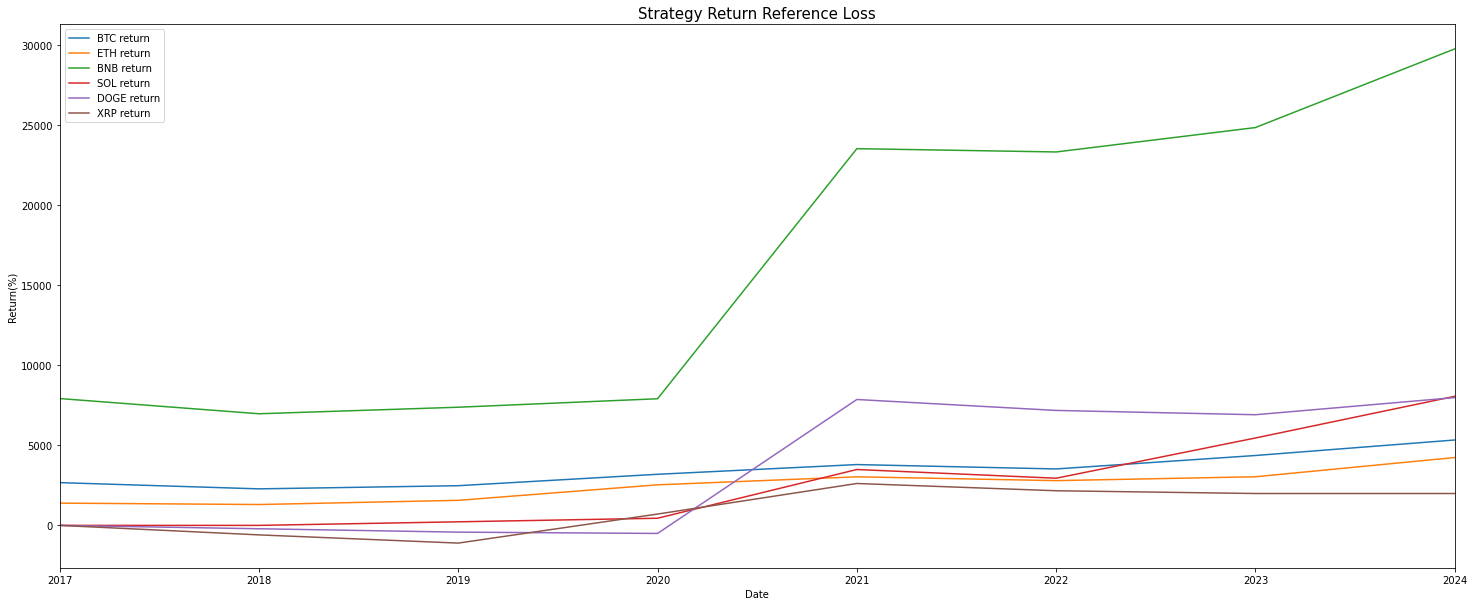

In [144]:

fig = plt.subplots(figsize=(25, 10))

plt.title('Strategy Return Reference Loss', fontsize=15)

plt.xlabel('Date', fontsize=10)
plt.ylabel('Return(%)', fontsize=10)

plt.plot(BTC_performance['date'], BTC_performance['pl_percent'], label="BTC return")
plt.plot(ETH_performance['date'], ETH_performance['pl_percent'], label="ETH return")
plt.plot(BNB_performance['date'], BNB_performance['pl_percent'], label="BNB return")
plt.plot(SOL_performance['date'], SOL_performance['pl_percent'], label="SOL return")
plt.plot(DOGE_performance['date'], DOGE_performance['pl_percent'], label="DOGE return")
plt.plot(XRP_performance['date'], XRP_performance['pl_percent'], label="XRP return")
plt.legend()

plt.xlim(BTC_performance['date'].min(), BTC_performance['date'].max())

(2017.0, 2024.0)

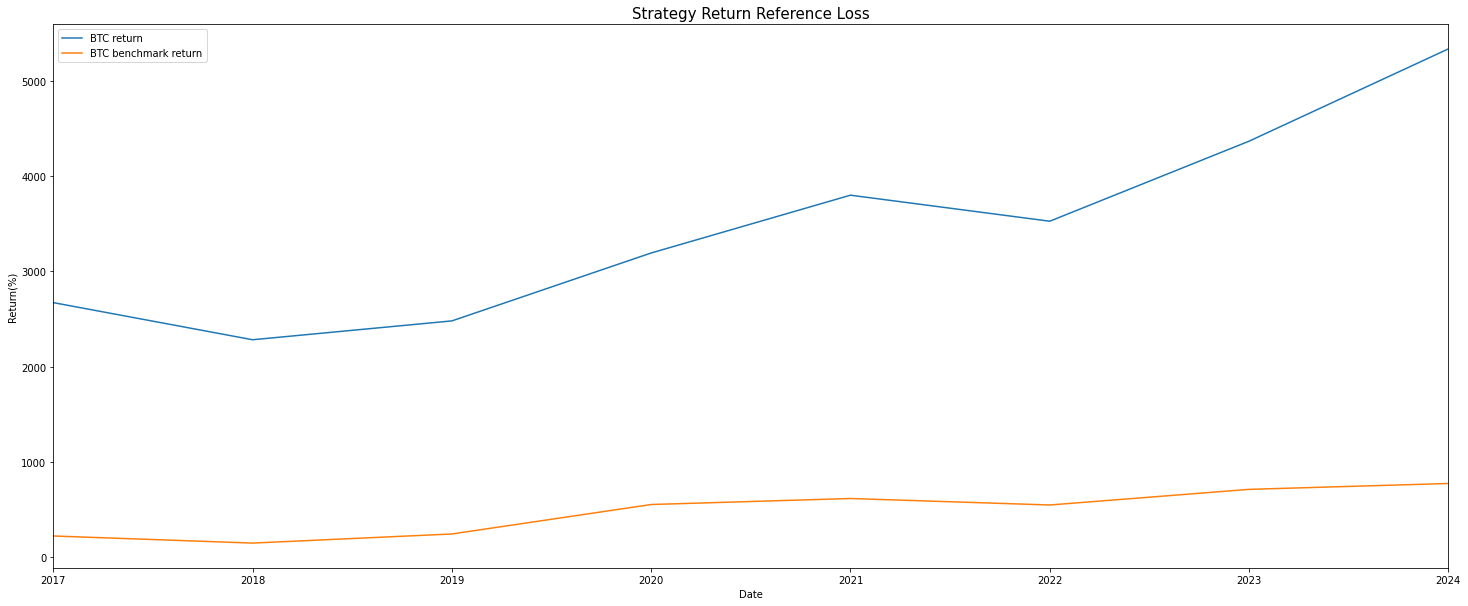

In [145]:
fig = plt.subplots(figsize=(25, 10))

plt.title('Strategy Return Reference Loss', fontsize=15)

plt.xlabel('Date', fontsize=10)
plt.ylabel('Return(%)', fontsize=10)

plt.plot(BTC_performance['date'], BTC_performance['pl_percent'], label="BTC return")
plt.plot(benchmark_BTC_performance['date'], benchmark_BTC_performance['pl_percent'], label="BTC benchmark return")

plt.legend()

plt.xlim(BTC_performance['date'].min(), BTC_performance['date'].max())

(2017.0, 2024.0)

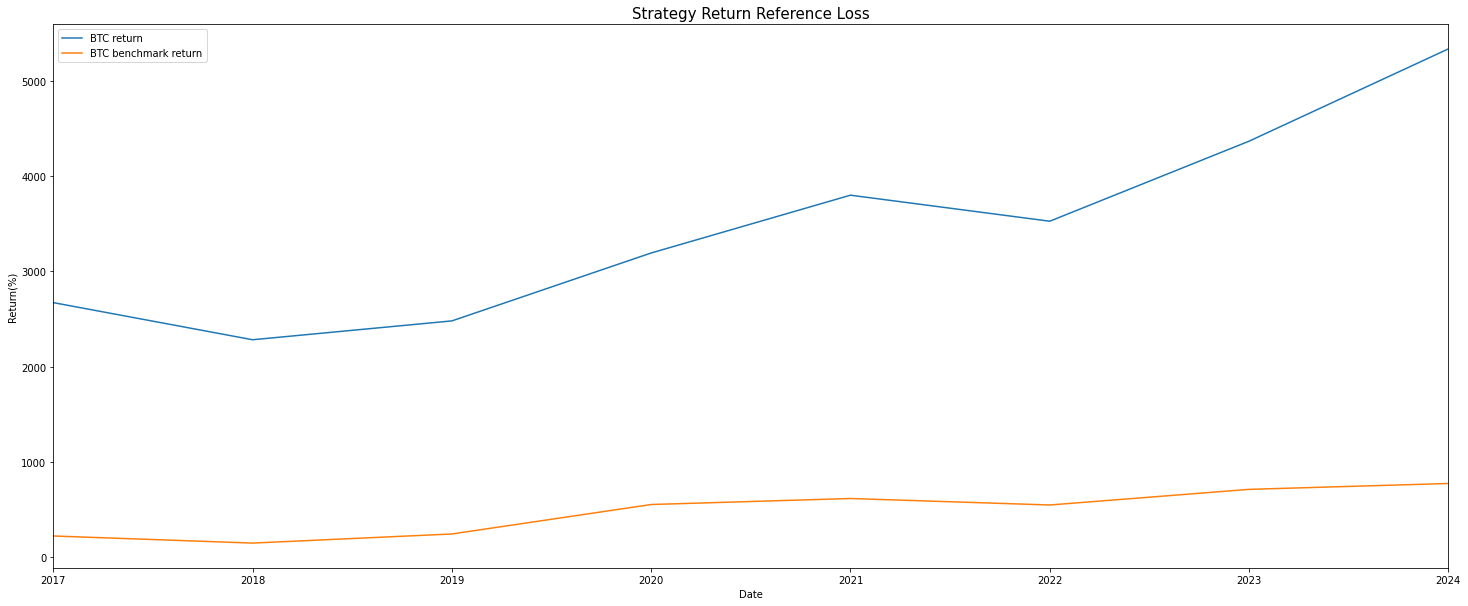

In [146]:
fig = plt.subplots(figsize=(25, 10))

plt.title('Strategy Return Reference Loss', fontsize=15)

plt.xlabel('Date', fontsize=10)
plt.ylabel('Return(%)', fontsize=10)

plt.plot(BTC_performance['date'], BTC_performance['pl_percent'], label="BTC return")
plt.plot(benchmark_BTC_performance['date'], benchmark_BTC_performance['pl_percent'], label="BTC benchmark return")

plt.legend()

plt.xlim(BTC_performance['date'].min(), BTC_performance['date'].max())